In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('data/fish.zip')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.shape

(159, 7)

Выведем информацию о пропусках и о типах данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Строим гистограммы и коробчатые диаграммы числовых признаков

In [5]:
types = data.dtypes
num_features = list(types[types != 'object'].index)
num_features

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

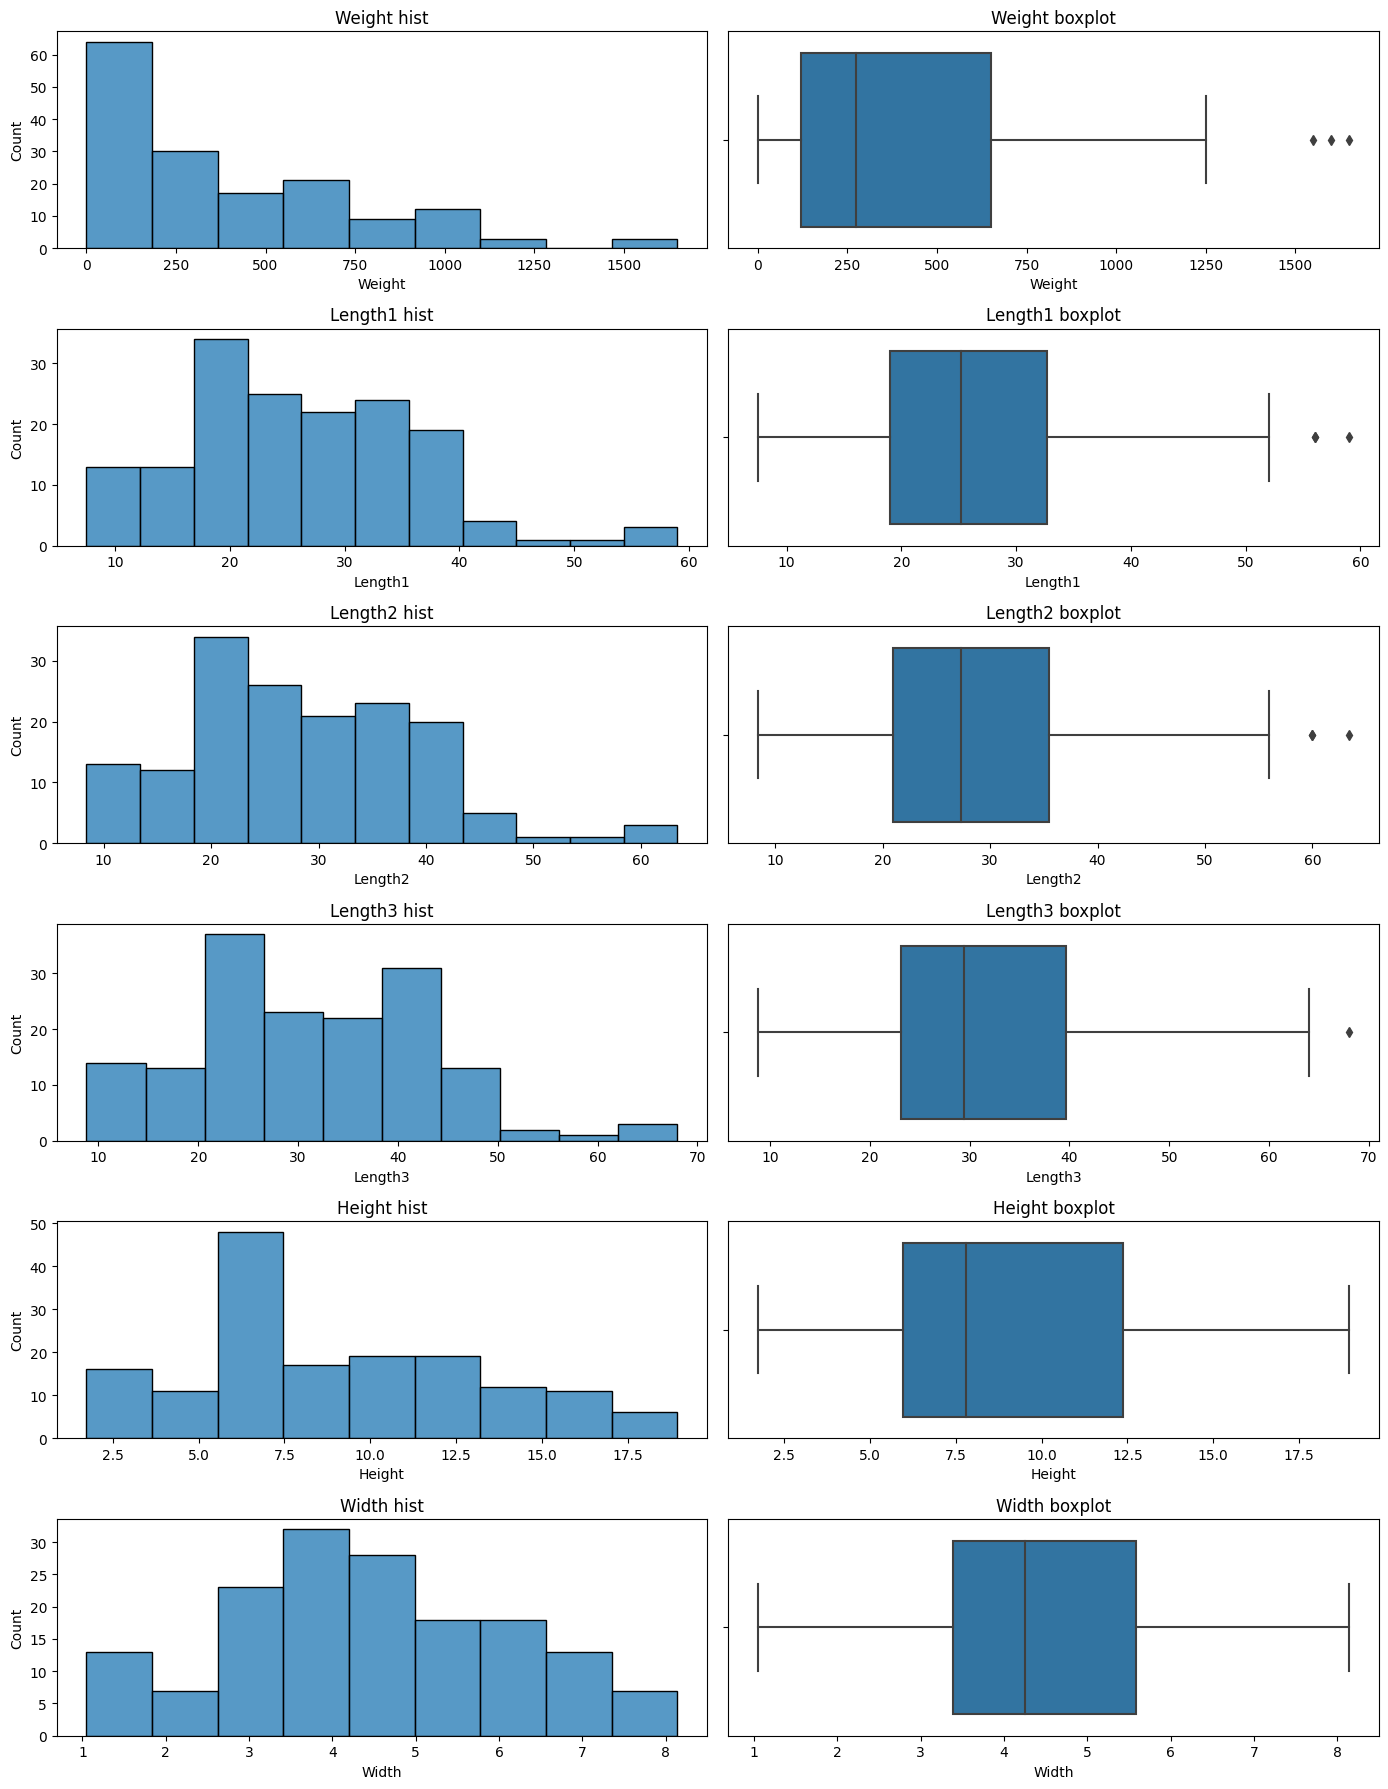

In [6]:
n = len(num_features) # определяем количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(14, 3*n))
# цикл для всех признаков из списка
for i, feature in enumerate(num_features):
    # строим гистограмму распределения признака
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    # строим коробчатую диаграмму распределения признака
    boxplot = sns.boxplot(data=data, x=feature, ax=axes[i][1])
    boxplot.set_title(f'{feature} boxplot')
plt.tight_layout() # выравнивание графиков

Строим столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков

In [7]:
# список категориальных признаков
cat_features = list(types[types == 'object'].index)
cat_features

['Species']

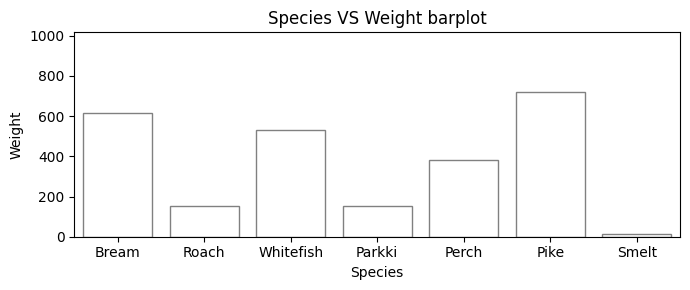

In [11]:
n = len(cat_features) # определяем количество числовых признаков
fig, axes = plt.subplots(n, figsize=(7, n*3))
# цикл для всех признаков из списка
for i, feature in enumerate(cat_features):
    # строим столбчатую диаграмму мед расходов в зависимости от признаков
    barplot = sns.barplot(data=data, x=feature, y=data['Weight'], 
                          edgecolor=".5", facecolor=(0, 0, 0, 0),
                          errwidth=0)
    barplot.set_title(f'{feature} VS Weight barplot')
plt.tight_layout() # выравнивание графиков

Строим диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных

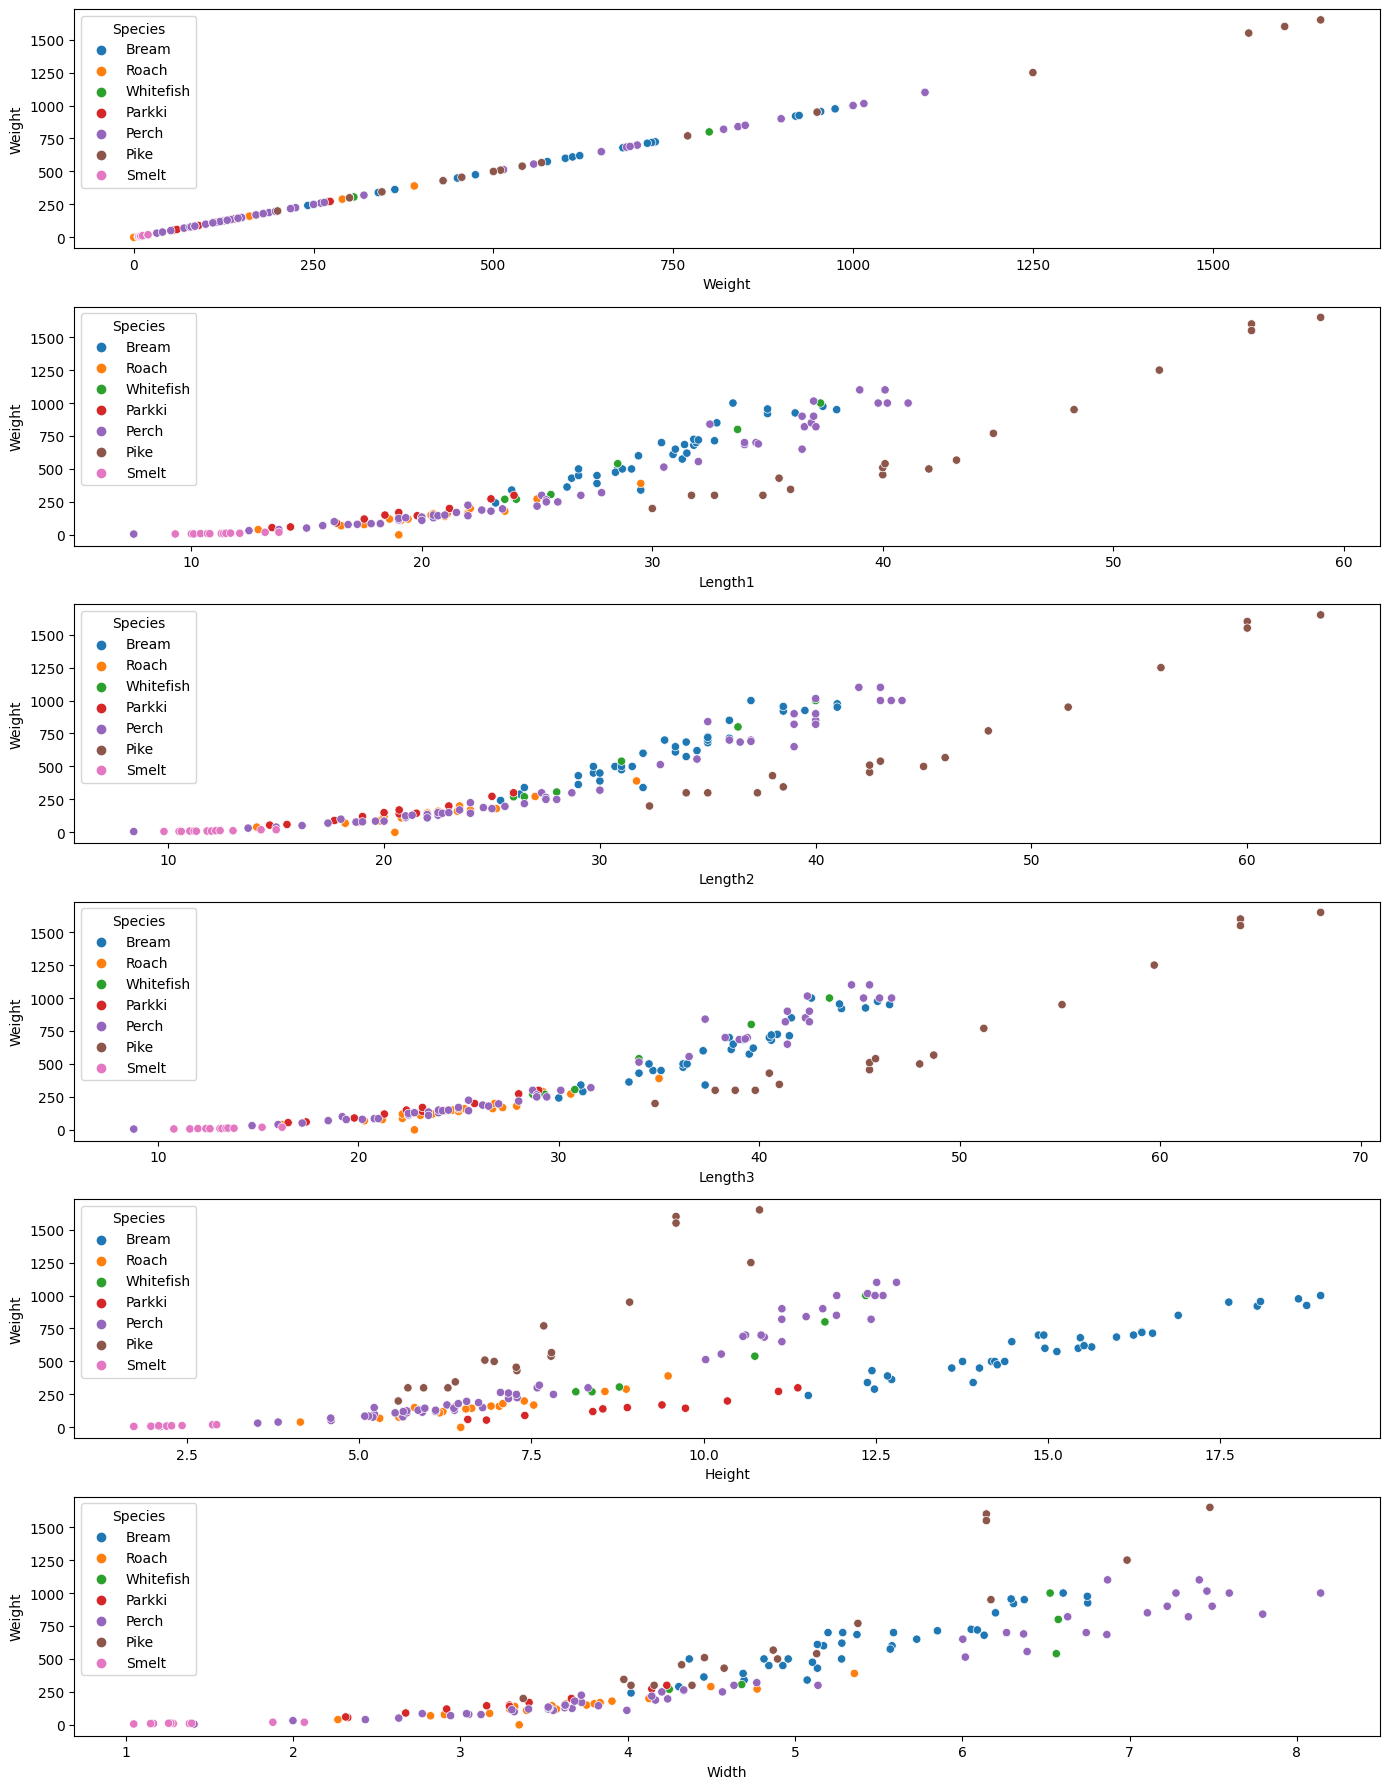

In [14]:
num_len = len(num_features) # определяем количество числовых признаков
cat_len = len(cat_features) # определяем количество категориальных признаков
fig, axes = plt.subplots(num_len, cat_len, figsize=(14, 3*num_len))
# цикл для всех числовых признаков (новая строка)
for i, num_feature in enumerate(num_features):
    for j, cat_feature in enumerate(cat_features):
        # строим диаграмму
        scatter = sns.scatterplot(data=data, x=num_feature, y=data['Weight'], 
                                ax=axes[i], hue=cat_feature)
        histplot.set_title(f'Scatter от {num_feature} от {cat_feature}')
plt.tight_layout() # выравнивание графиков

**Кодируем категориальные признаки**

In [15]:
# категориальные признаки кодируемс с помощью OneHot
data = pd.get_dummies(data)
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


Выделяем факторы и целевой признак в отдельные таблицы

In [16]:
features = data.drop(columns='Weight').columns
X, y = data[features], data['Weight']

**Начинаем работу над моделью**

Разделяем набор данных на тренировочную и тестовую

In [17]:
# разделяем датасет на тренировочную и тестовую выборки. Метод train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, # таблица с наблюдениями и вектор правильных овтетов
    test_size=0.2,
    random_state=42
)

# выводим размеры полученых выборок
print(f'Train shape: - X:{X_train.shape}: y - {y_train.shape}')
print(f'Test shape: - X:{X_test.shape}: y - {y_test.shape}')

Train shape: - X:(127, 12): y - (127,)
Test shape: - X:(32, 12): y - (32,)


Обучаем модель линейной регрессии аналитическим методом

In [18]:
# создаем объект класса
lr_analyt = linear_model.LinearRegression()
# обучаем модель на тренировочных данных
lr_analyt.fit(X_train, y_train)
# находим чему равны параметры
print('w0: {}'.format(lr_analyt.intercept_)) #свободный член w0
print('w1: {}'.format(lr_analyt.coef_))      #остальные параметры модели w1, w2, ..., wm

w0: -784.5066382404111
w1: [ -59.1395506    55.61529428   39.05378679  -10.73045193    7.22621264
  -42.31151092   97.25091484   32.35928897 -373.68699528   -7.3166755
  288.37496441    5.33001349]


С помощью модели делаем предсказание на тренировочной выборке

Создаем функцию вывода расчитанных метрик

In [19]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    """Выводит информацию о метриках

    Args:
        y_train (_type_): Series
        y_train_predict (_type_): Series
        y_test (_type_): Series
        y_test_predict (_type_): Series
    """
    print(f'Train R^2: {round(metrics.r2_score(y_train, y_train_predict), 4)}')
    print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_predict), 3)}')
    print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict), 3)}')
    print()
    
    print(f'Test R^2: {round(metrics.r2_score(y_test, y_test_predict), 4)}')
    print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_predict), 3)}')
    print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict), 3)}')

In [20]:
y_train_predict = lr_analyt.predict(X_train)
y_test_predict = lr_analyt.predict(X_test)

# выводим метрики
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.9286
Train MAE: 69.173
Train MAPE: 2475300636647755.5

Test R^2: 0.9507
Test MAE: 65.3
Test MAPE: 1.082


Строим диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках.

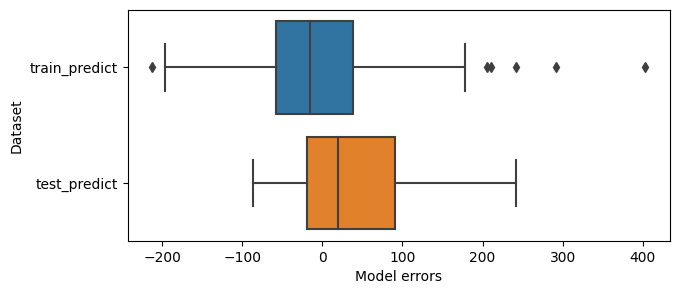

In [22]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(7, 3))     # фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_train = y_train - y_train_predict
y_errors_test = y_test - y_test_predict

#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'train_predict': y_errors_train, 
     'test_predict': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Dataset'); #название оси ординат

**Проведем нормализацию**

In [23]:
# создаем объект класса
scaller = preprocessing.MinMaxScaler()
# вычисляем параметры нормализации
scaller.fit(X_train)
# производим преобразования
X_train_scaled = scaller.transform(X_train)
X_test_scaled = scaller.transform(X_test)

**Создаем полиномиальные признаки**

In [24]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
# вычисляем параметры
poly.fit(X_train_scaled)
# производим преобразования для каждой выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (127, 90)
Test shape: (32, 90)


**Обучаем модель на полиномиальных признаках**

In [25]:
# создаем экземпляр класса
lr_analyt_poly = linear_model.LinearRegression()
# обучаем модель
lr_analyt_poly.fit(X_train_scaled_poly, y_train)
# предсказываем значения
y_train_predict_poly = lr_analyt_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lr_analyt_poly.predict(X_test_scaled_poly)

# выводим метрики
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.9911
Train MAE: 21.7
Train MAPE: 2955755640189928.0

Test R^2: -5.6849197527883264e+17
Test MAE: 71860722265.485
Test MAPE: 223152731.668


Выводим значения коэффициентов полученой модели

In [26]:
print('w0: {}'.format(lr_analyt_poly.intercept_)) #свободный член w0
print('w1: {}'.format(lr_analyt_poly.coef_))      #остальные параметры модели w1, w2, ..., wm

w0: 1239773657427.8044
w1: [ 3.57601346e+14 -1.43863774e+13 -1.38328619e+13 -8.06768672e+12
  2.43823291e+12 -6.19886828e+11 -6.19886828e+11 -6.19886829e+11
 -6.19886829e+11 -6.19886829e+11 -6.19886829e+11  3.71932097e+12
  8.51432188e+04 -4.32655484e+05  1.89005859e+05 -8.05235938e+03
  4.28044688e+04 -3.57601346e+14 -3.57601346e+14 -3.57601346e+14
 -3.57601346e+14 -3.57601346e+14 -3.57601346e+14 -1.03608330e+14
  3.58878875e+05 -1.32471844e+05 -9.22228750e+04 -1.43463125e+04
  1.43863774e+13  1.43863774e+13  1.43863774e+13  1.43863774e+13
  1.43863774e+13  1.43863774e+13 -1.00704642e+14 -6.75503672e+04
  1.14982012e+05 -3.63414844e+04  1.38328619e+13  1.38328619e+13
  1.38328619e+13  1.38328619e+13  1.38328619e+13  1.38328619e+13
 -9.68300332e+13 -3.79112500e+03 -2.47800000e+03  8.06768672e+12
  8.06768672e+12  8.06768672e+12  8.06768672e+12  8.06768672e+12
  8.06768672e+12 -5.64738071e+13  3.05893359e+03 -2.43823291e+12
 -2.43823291e+12 -2.43823291e+12 -2.43823291e+12 -2.43823291e+1

Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.

**Строим модель с L1-регуляризацией (Lasso)**

In [27]:
# инициализируем объект класса
lr_lasso = linear_model.Lasso(max_iter=2000)
# обучаем модель
lr_lasso.fit(X_train_scaled_poly, y_train)
# предсказываем
y_train_predict_poly_lasso = lr_lasso.predict(X_train_scaled_poly)
y_test_predict_poly_lasso = lr_lasso.predict(X_test_scaled_poly)

# выводим метрики
print_metrics(y_train, y_train_predict_poly_lasso, y_test, y_test_predict_poly_lasso)

Train R^2: 0.9801
Train MAE: 30.355
Train MAPE: 3893355410165597.5

Test R^2: 0.9742
Test MAE: 41.92
Test MAPE: 0.371


Выводим значения коэффициентов полученой модели

In [28]:
print('w0: {}'.format(lr_analyt_poly.intercept_)) #свободный член w0
print(f'w1: {np.round(lr_analyt_poly.coef_, 2)}')      #остальные параметры модели w1, w2, ..., wm

w0: 1239773657427.8044
w1: [ 3.57601346e+14 -1.43863774e+13 -1.38328619e+13 -8.06768672e+12
  2.43823291e+12 -6.19886828e+11 -6.19886828e+11 -6.19886829e+11
 -6.19886829e+11 -6.19886829e+11 -6.19886829e+11  3.71932097e+12
  8.51432200e+04 -4.32655480e+05  1.89005860e+05 -8.05236000e+03
  4.28044700e+04 -3.57601346e+14 -3.57601346e+14 -3.57601346e+14
 -3.57601346e+14 -3.57601346e+14 -3.57601346e+14 -1.03608330e+14
  3.58878880e+05 -1.32471840e+05 -9.22228800e+04 -1.43463100e+04
  1.43863774e+13  1.43863774e+13  1.43863774e+13  1.43863774e+13
  1.43863774e+13  1.43863774e+13 -1.00704642e+14 -6.75503700e+04
  1.14982010e+05 -3.63414800e+04  1.38328619e+13  1.38328619e+13
  1.38328619e+13  1.38328619e+13  1.38328619e+13  1.38328619e+13
 -9.68300332e+13 -3.79112000e+03 -2.47800000e+03  8.06768672e+12
  8.06768672e+12  8.06768672e+12  8.06768672e+12  8.06768672e+12
  8.06768672e+12 -5.64738071e+13  3.05893000e+03 -2.43823291e+12
 -2.43823291e+12 -2.43823291e+12 -2.43823291e+12 -2.43823291e+1

Значения коэффициентов по прежнему высокие. Незначительное количество коэффициентов обнулилось, т.к. модель посчитала, что они не важны в расчете

**Строим модель с L2-регуляризацией (Lasso)**

In [29]:
# инициализируем объект класса
lr_ridge = linear_model.Ridge(max_iter=2000)
# обучаем модель
lr_ridge.fit(X_train_scaled_poly, y_train)
# предсказываем
y_train_predict_poly_ridge = lr_ridge.predict(X_train_scaled_poly)
y_test_predict_poly_ridge = lr_ridge.predict(X_test_scaled_poly)

# выводим метрики
print_metrics(y_train, y_train_predict_poly_ridge, y_test, y_test_predict_poly_ridge)

Train R^2: 0.9787
Train MAE: 32.281
Train MAPE: 3698622987691774.0

Test R^2: 0.9791
Test MAE: 37.902
Test MAPE: 0.264


**Строим модель с L2-регуляризацией (Lasso) с учетом логарифмирования целевого признака**

In [32]:
# # инициализируем объект класса
# lr_ridge = linear_model.Ridge(max_iter=4000)
# # обучаем модель
# lr_ridge.fit(X_train_scaled_poly, np.log(y_train))
# # предсказываем
# y_train_predict_poly_ridge = np.exp(lr_ridge.predict(X_train_scaled_poly))
# y_test_predict_poly_ridge = np.exp(lr_ridge.predict(X_test_scaled_poly))

# # выводим метрики
# print_metrics(y_train, y_train_predict_poly_ridge, y_test, y_test_predict_poly_ridge)